# Create graphs to look for trends in Airbnb annual average rates

In [1]:
# Dependencies
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import requests
import json
from config import gkey

import folium
from folium.plugins import HeatMap
import os

In [2]:
# Load csv file into a dataframe
df = pd.read_csv("Data/airbnbdataanalysis.csv")
df.head()

,neighbourhood,Ave rate 2015,No. listings 2015,Ave rate 2016,No. listings 2016,Ave rate 2017,No. listings 2017,District
0,Bayview,46374.21,84,58118.04,126,45354.45,117,Southern
1,Bernal Heights,68704.42,156,77447.15,191,72724.98,222,Southern
2,Castro/Upper Market,84268.13,191,97370.54,246,90733.81,231,Southern
3,Chinatown,91821.37,78,108057.51,123,99129.42,129,Downtown
4,Crocker Amazon,47207.84,46,43735.51,51,35399.72,52,Southern


## Graph by neighbourhood

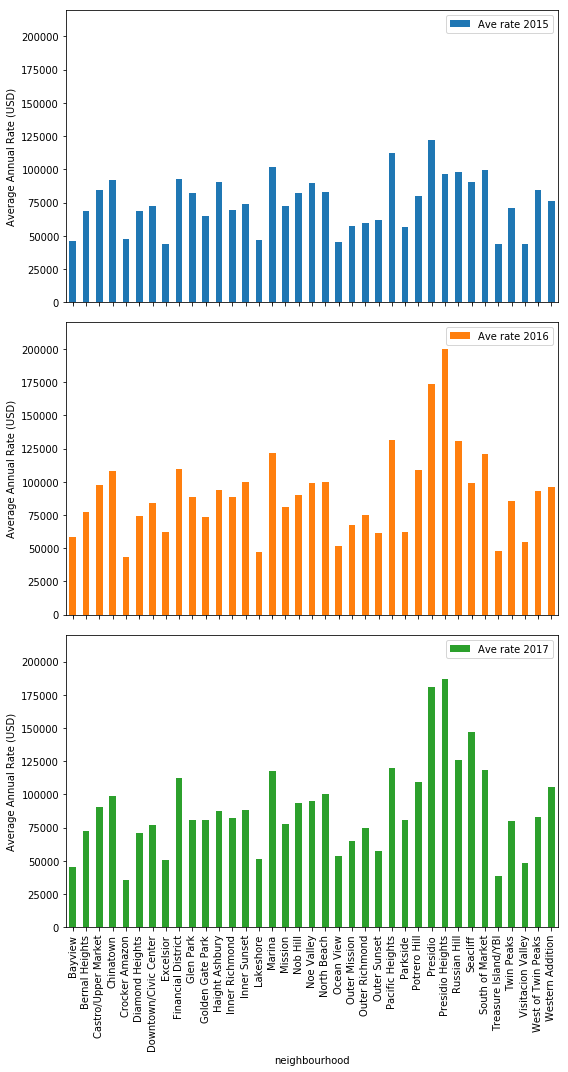

In [3]:
# Plot annual average short-term rent rates for 2015–2017 in subplots
ax = df.plot.bar(x = "neighbourhood", y = ["Ave rate 2015", "Ave rate 2016", "Ave rate 2017"], subplots = True,
                 figsize = (8,15), title = ["", "", ""])
ax[0].set_ylabel("Average Annual Rate (USD)")
ax[1].set_ylabel("Average Annual Rate (USD)")
ax[2].set_ylabel("Average Annual Rate (USD)")

ax[0].set_ylim(0, 220000)
ax[1].set_ylim(0, 220000)
ax[2].set_ylim(0, 220000)


# Save file as svg
plt.tight_layout()
plt.savefig("Images/Airbnb_annual_avg.svg")
plt.savefig("Images/Airbnb_annual_avg.png")

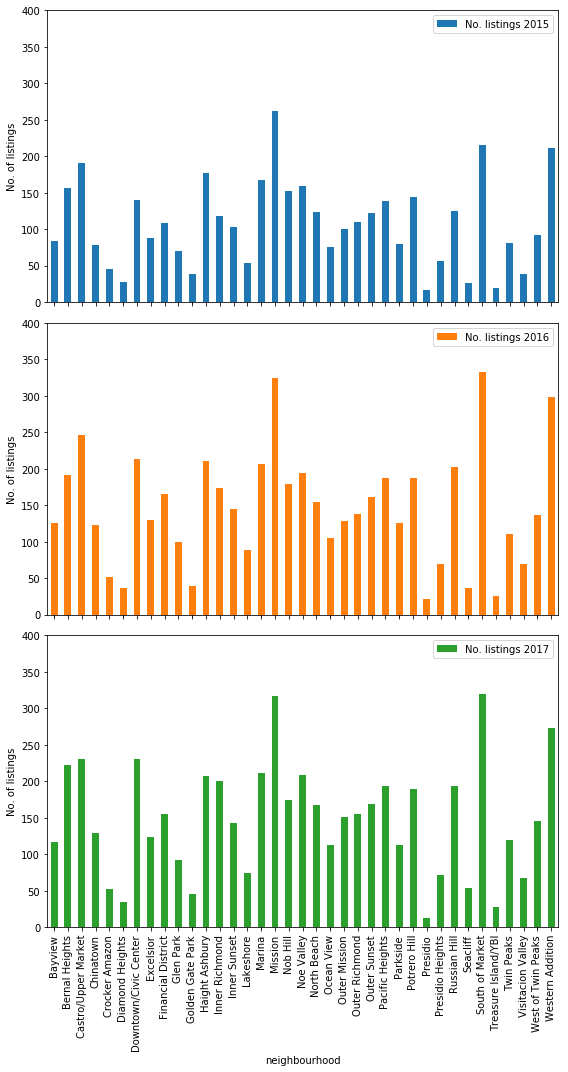

In [4]:
# Plot number of listings for 2015–2017 in subplots
ax = df.plot.bar(x = "neighbourhood", y = ["No. listings 2015", "No. listings 2016", "No. listings 2017"], 
                 subplots = True,
                 figsize = (8,15), title = ["", "", ""])
ax[0].set_ylabel("No. of listings")
ax[1].set_ylabel("No. of listings")
ax[2].set_ylabel("No. of listings")

ax[0].set_ylim(0, 400)
ax[1].set_ylim(0, 400)
ax[2].set_ylim(0, 400)


# Save file as svg
plt.tight_layout()
plt.savefig("Images/Airbnb_neighbourhood_listings.svg")
plt.savefig("Images/Airbnb_neighbourhood_listings.png")

## Graph by district

In [5]:
# Group the data by neighbourhood
df2 = round(df.groupby("District").mean(),2)
df2.reset_index()

,District,Ave rate 2015,No. listings 2015,Ave rate 2016,No. listings 2016,Ave rate 2017,No. listings 2017
0,Downtown,86925.70,136.33,102187.23,194.50,100009.63,195.83
1,North Downtown,95777.05,86.83,134296.23,119.00,128307.98,118.50
2,Outside Lands,63293.06,80.67,73177.32,112.22,79595.16,118.22
3,Southern,67031.51,109.93,77966.57,145.07,71731.87,148.00
4,Western Addition,83030.29,194.50,95180.90,255.00,96371.37,240.00


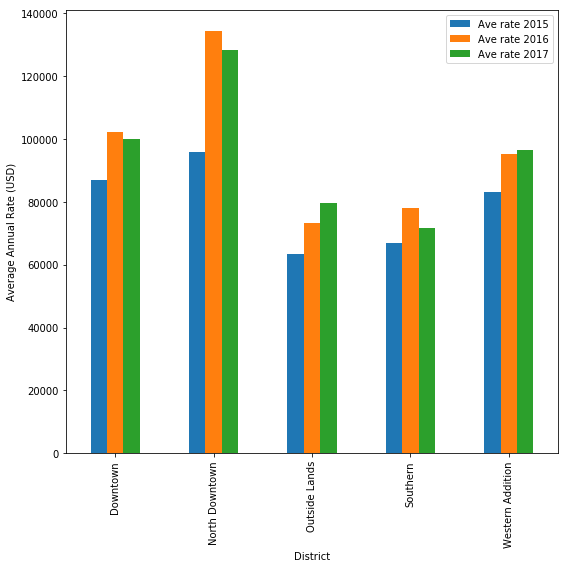

In [6]:
# Plot annual average rate of Airbnb
ax2 = df2.plot.bar(y = ["Ave rate 2015", "Ave rate 2016", "Ave rate 2017"], figsize = (8, 8))
ax2.set_ylabel("Average Annual Rate (USD)")

# Save file as svg
plt.tight_layout()
plt.savefig("Images/Airbnb_annual_avg2.svg")
plt.savefig("Images/Airbnb_annual_avg2.png")

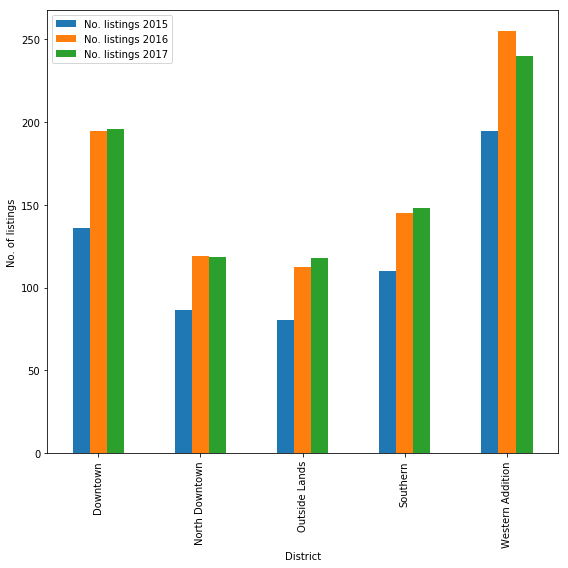

In [7]:
# Plot annual number of listings of short-term rentals
ax2 = df2.plot.bar(y = ["No. listings 2015", "No. listings 2016", "No. listings 2017"], figsize = (8, 8))
ax2.set_ylabel("No. of listings")

# Save file as svg
plt.tight_layout()
plt.savefig("Images/Airbnb_district_listings.svg")
plt.savefig("Images/Airbnb_district_listings.png")

## Heatmaps of neighbourhoods and short-term rental rates

In [8]:
# Add columns for geolocations
df["City"] = "San Francisco"
df["Lat"] = ""
df["Long"] = ""
df.head()

,neighbourhood,Ave rate 2015,No. listings 2015,Ave rate 2016,No. listings 2016,Ave rate 2017,No. listings 2017,District,City,Lat,Long
0,Bayview,46374.21,84,58118.04,126,45354.45,117,Southern,San Francisco,,
1,Bernal Heights,68704.42,156,77447.15,191,72724.98,222,Southern,San Francisco,,
2,Castro/Upper Market,84268.13,191,97370.54,246,90733.81,231,Southern,San Francisco,,
3,Chinatown,91821.37,78,108057.51,123,99129.42,129,Downtown,San Francisco,,
4,Crocker Amazon,47207.84,46,43735.51,51,35399.72,52,Southern,San Francisco,,


In [9]:
# Add coordinates per neighbourhood
for index, row in df.iterrows():
    city = row["City"]
    neighborhood = row["neighbourhood"]
    
    url = f"https://maps.googleapis.com/maps/api/geocode/json?address={neighborhood}&{city}&key={gkey}"
    response_json = requests.get(url).json()


    #pprint(response_json)    
    
    df.loc[index,"Lat"] = response_json["results"][0]["geometry"]["location"]["lat"]
    df.loc[index,"Long"] = response_json["results"][0]["geometry"]["location"]["lng"]

In [10]:
# Print the dataframe
df.head()

,neighbourhood,Ave rate 2015,No. listings 2015,Ave rate 2016,No. listings 2016,Ave rate 2017,No. listings 2017,District,City,Lat,Long
0,Bayview,46374.21,84,58118.04,126,45354.45,117,Southern,San Francisco,37.7304,-122.384
1,Bernal Heights,68704.42,156,77447.15,191,72724.98,222,Southern,San Francisco,37.7389,-122.415
2,Castro/Upper Market,84268.13,191,97370.54,246,90733.81,231,Southern,San Francisco,37.7638,-122.434
3,Chinatown,91821.37,78,108057.51,123,99129.42,129,Downtown,San Francisco,40.7158,-73.997
4,Crocker Amazon,47207.84,46,43735.51,51,35399.72,52,Southern,San Francisco,37.712,-122.438


In [11]:
# Create the heatmap for listings (2015)
# Resource: https://alcidanalytics.com/p/geographic-heatmap-in-python

max_amount= float(df["No. listings 2017"].max())

hmap_2015 = folium.Map(location=[37.7749, -122.419], zoom_start= 11, )

hm_wide_2015 = HeatMap( list(zip(df["Lat"], df["Long"], df["No. listings 2015"])),
                   min_opacity=0.2,
                   max_val=max_amount,
                   radius=25, blur=27, 
                   max_zoom=1, 
                 )

hmap_2015.add_child(hm_wide_2015)

# Save file
hmap_2015.save(os.path.join('Images', 'heatmap_listings_2015.html'))

In [12]:
# Create the heatmap for listings (2016)
# Resource: https://alcidanalytics.com/p/geographic-heatmap-in-python

max_amount= float(df["No. listings 2017"].max())

hmap_2016 = folium.Map(location=[37.7749, -122.419], zoom_start= 11, )

hm_wide_2016 = HeatMap( list(zip(df["Lat"], df["Long"], df["No. listings 2016"])),
                   min_opacity=0.2,
                   max_val=max_amount,
                   radius=25, blur=27, 
                   max_zoom=1, 
                 )

hmap_2016.add_child(hm_wide_2016)

# Save file
hmap_2016.save(os.path.join('Images', 'heatmap_listings_2016.html'))

In [13]:
# Create the heatmap for listings (2017)
# Resource: https://alcidanalytics.com/p/geographic-heatmap-in-python

max_amount= float(df["No. listings 2017"].max())

hmap_2017 = folium.Map(location=[37.7749, -122.419], zoom_start= 11, )

hm_wide_2017 = HeatMap( list(zip(df["Lat"], df["Long"], df["No. listings 2017"])),
                   min_opacity=0.2,
                   max_val=max_amount,
                   radius=25, blur=27, 
                   max_zoom=1, 
                 )

hmap_2017.add_child(hm_wide_2017)

# Save file
hmap_2017.save(os.path.join('Images', 'heatmap_listings_2017.html'))

In [14]:
# Create the heatmap for rental rates (2016)
# Resource: https://alcidanalytics.com/p/geographic-heatmap-in-python 

max_amount_r = float(df["Ave rate 2017"].max())

hmap_2015r = folium.Map(location=[37.7749, -122.419], zoom_start= 11, )

hm_wide_2015r = HeatMap( list(zip(df["Lat"], df["Long"], df["Ave rate 2015"])),
                   min_opacity=0.2,
                   max_val=max_amount_r,
                   radius=25, blur=27, 
                   max_zoom=1, 
                 )

hmap_2015r.add_child(hm_wide_2015r)

# Save file
hmap_2015r.save(os.path.join('Images', 'heatmap_str_rate_2015.html'))

In [17]:
# Create the heatmap for rental rates (2016)
# Resource: https://alcidanalytics.com/p/geographic-heatmap-in-python

max_amount_r= float(df["No. listings 2017"].max())

hmap_2016r = folium.Map(location=[37.7749, -122.419], zoom_start= 11, )

hm_wide_2016r = HeatMap( list(zip(df["Lat"], df["Long"], df["Ave rate 2016"])),
                   min_opacity=0.2,
                   max_val=max_amount_r,
                   radius=25, blur=27, 
                   max_zoom=1, 
                 )

hmap_2016r.add_child(hm_wide_2016r)

# Save file
hmap_2016r.save(os.path.join('Images', 'heatmap_str_rate_2016.html'))

In [16]:
# Create the heatmap for listings (2017)
# Resource: https://alcidanalytics.com/p/geographic-heatmap-in-python

max_amount_r= float(df["No. listings 2017"].max())

hmap_2017r = folium.Map(location=[37.7749, -122.419], zoom_start= 11, )

hm_wide_2017r = HeatMap( list(zip(df["Lat"], df["Long"], df["Ave rate 2017"])),
                   min_opacity=0.2,
                   max_val=max_amount_r,
                   radius=25, blur=27, 
                   max_zoom=1, 
                 )

hmap_2017r.add_child(hm_wide_2017r)

# Save file
hmap_2017r.save(os.path.join('Images', 'heatmap_str_rate_2017.html'))